# Bacchus ex machina: Tapping into beer ratings 


## 1. Preparing the data

### Gathering and loading the data

In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics 
%matplotlib inline

In [2]:
beers_raw = pd.read_csv('Udacity/Project_1_blogpost/data/Untappd/main_data_checkins.csv')
beers_raw.describe()

,checkin_id,rating_score,user_id,beer_id,beer_abv,brewery_id,toasts_count,venue_id,venue_lat,venue_lng,avg_rating,ratings_count,checkins_count
count,1.764000e+03,1764.000000,1764.0,1.764000e+03,1764.000000,1764.000000,1764.000000,1.756000e+03,1756.000000,1756.000000,1757.000000,1764.000000,1.764000e+03
mean,6.999786e+08,3.484552,1279815.0,2.406620e+06,5.642557,188088.392857,0.775510,6.545958e+06,54.161451,27.493325,3.744599,10524.557256,2.498015e+04
std,9.964986e+07,0.781510,0.0,1.024158e+06,1.658378,146588.355060,0.851112,2.276028e+06,0.933511,1.713797,0.350339,59890.861272,1.896451e+05
min,4.400218e+08,0.000000,1279815.0,2.220000e+02,0.000000,5.000000,0.000000,7.229400e+04,52.084400,21.970700,2.050000,2.000000,2.000000e+00
25%,6.252423e+08,3.250000,1279815.0,1.952716e+06,4.700000,38368.000000,0.000000,5.158762e+06,53.891600,27.557500,3.520000,158.000000,1.820000e+02
50%,7.302946e+08,3.750000,1279815.0,2.740880e+06,5.500000,200065.000000,1.000000,6.396062e+06,53.905700,27.569700,3.800000,376.000000,4.390000e+02
75%,7.830787e+08,4.000000,1279815.0,3.193626e+06,6.400000,324549.000000,1.000000,8.686496e+06,53.933600,27.575600,4.000000,1386.000000,1.751750e+03
max,8.374528e+08,4.750000,1279815.0,3.550871e+06,22.000000,450201.000000,4.000000,9.453315e+06,59.450400,37.625100,4.570000,640549.000000,2.240000e+06


In [3]:
pd.set_option('display.max_columns', len(beers_raw.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
beers_raw.head(3)

,checkin_comment,checkin_id,created_at,rating_score,user_id,user_name,beer_id,beer_name,beer_style,beer_slug,beer_abv,beer_link,brewery_id,brewery_name,brewery_type,brewery_country,brewery_city,brewery_link,source_app,toasts_count,venue_id,venue_name,venue_country,venue_city,venue_lat,venue_lng,avg_rating,ratings_count,checkins_count
0,NaN,837452836,2019-12-04 23:29:33,3.00,1279815,gruntoff,222979,Gambrinus Originál 10,Pilsner - Czech,plzensky-prazdroj-gambrinus-original-10,4.3,https://untappd.com/b/plzensky-prazdroj-gambri...,1459,Plzeňský Prazdroj,Macro Brewery,Czech Republic,Pilsen,https://untappd.com/plzenskyprazdroj,Untappd for iPhone - (V2),1,8794204.0,Puzzles,Беларусь,Мінск,53.8609,27.5700,3.08,26179.0,36105.0
1,NaN,837110052,2019-12-03 17:15:35,3.25,1279815,gruntoff,21655,Alivaria Beloe Zoloto (Аливария Белое Золото),Witbier,pi-zavod-alivaryya-alivaria-brewery-alivaria-b...,5.0,https://untappd.com/b/pi-zavod-alivaryya-aliva...,5861,Пивоваренная компания «Аливария» (Alivaria Bre...,Macro Brewery,Belarus,Минск,https://untappd.com/Alivaria_Brewery,Untappd for iPhone - (V2),1,5407128.0,Crazy Horse,Беларусь,Мінск,53.8862,27.5809,3.18,2131.0,3365.0
2,Why so carbonated?,836971736,2019-12-02 21:50:53,3.75,1279815,gruntoff,3362329,Sourdept Kalamansi,Sour - Fruited,brewlok-craft-and-classic-brewery-sourdept-kal...,5.0,https://untappd.com/b/brewlok-craft-and-classi...,210255,Brewlok Craft & Classic Brewery,Micro Brewery,Russia,Voronezh,https://untappd.com/Brewlokbrewery,Untappd for iPhone - (V2),2,8794204.0,Puzzles,Беларусь,Мінск,53.8609,27.5700,3.69,374.0,407.0


### Cleaning 
Dropping columns that are not useful for predicting ratings.

In [4]:
cols_to_drop = ['checkin_comment','checkin_id','user_id','user_name','beer_id','beer_name','beer_slug','beer_link','brewery_id','brewery_link','source_app','venue_id']
beers = beers_raw.drop(cols_to_drop, axis=1)

Handling missing values.

In [5]:
beers.isna().sum()

created_at           0
rating_score         0
beer_style           0
beer_abv             0
brewery_name         0
brewery_type         0
brewery_country      0
brewery_city       530
toasts_count         0
venue_name           8
venue_country        8
venue_city         108
venue_lat            8
venue_lng            8
avg_rating           7
ratings_count        0
checkins_count       0
dtype: int64

In [6]:
# coordinates are not required for running the model, so these are dropped
beers.drop(['venue_lat','venue_lng'], axis=1, inplace=True)

In [7]:
# replacing missing avg_rating values with the mean 
beers['avg_rating'].fillna(beers['avg_rating'].mean(), inplace=True)

In [8]:
# replacing missing categorical values with fillna
beers.fillna("Missing", inplace=True)
beers.isna().sum()

created_at         0
rating_score       0
beer_style         0
beer_abv           0
brewery_name       0
brewery_type       0
brewery_country    0
brewery_city       0
toasts_count       0
venue_name         0
venue_country      0
venue_city         0
avg_rating         0
ratings_count      0
checkins_count     0
dtype: int64

### Transforming 

In [9]:
beers.dtypes

created_at          object
rating_score       float64
beer_style          object
beer_abv           float64
brewery_name        object
brewery_type        object
brewery_country     object
brewery_city        object
toasts_count         int64
venue_name          object
venue_country       object
venue_city          object
avg_rating         float64
ratings_count      float64
checkins_count     float64
dtype: object

In [10]:
cat_beers = beers.select_dtypes(include=['object']).copy()
num_beers = beers.select_dtypes(include=['float64','int64']).copy()

In [11]:
cat_beers.describe()

,created_at,beer_style,brewery_name,brewery_type,brewery_country,brewery_city,venue_name,venue_country,venue_city
count,1764,1764,1764,1764,1764,1764,1764,1764,1764
unique,1764,138,309,10,27,160,196,6,19
top,2018-10-20 20:09:57,Sour - Fruited,Jungle Brewery,Micro Brewery,Belarus,Missing,BeerCap Barshop,Беларусь,Мінск
freq,1,171,127,961,803,530,222,1567,1188


Of the categorical variables, a couple might be relevant for predicting ratings: 
- beer_style
- brewery_type
- brewery_country
- venue_country (perhaps?)
- venue_city (perhaps?)

Problem is, there are way too many levels per variable. Solution: grouping categories per variable.

In [12]:
pd.set_option('display.max_rows', 150)
beerstyle = beers['beer_style'].unique()
sorted(beerstyle)

['American Wild Ale',
 'Barleywine - English',
 'Belgian Blonde',
 'Belgian Dubbel',
 'Belgian Quadrupel',
 'Belgian Strong Golden Ale',
 'Bière de Garde',
 'Blonde Ale',
 'Bock - Hell / Maibock / Lentebock',
 'Bock - Weizenbock',
 'Brett Beer',
 'Brown Ale - American',
 'Brown Ale - Belgian',
 'Brown Ale - English',
 'Brown Ale - Imperial / Double',
 'Brown Ale - Other',
 'Chilli / Chile Beer',
 'Cider - Dry',
 'Cider - Herbed / Spiced / Hopped',
 'Cider - Ice / Applewine',
 'Cider - Other Fruit',
 'Cider - Perry',
 'Cider - Sweet',
 'Cider - Traditional',
 'Cream Ale',
 'Dunkelweizen',
 'English Bitter',
 'Extra Special / Strong Bitter',
 'Farmhouse Ale - Other',
 'Farmhouse Ale - Saison',
 'Freeze-distilled Beer',
 'Fruit Beer',
 'Ginger Beer',
 'Gluten-Free',
 'Golden Ale',
 'Grisette',
 'Gruit / Ancient Herbed Ale',
 'Hefeweizen',
 'IPA - American',
 'IPA - Belgian',
 'IPA - Black / Cascadian Dark Ale',
 'IPA - Brut',
 'IPA - English',
 'IPA - Farmhouse',
 'IPA - Imperial / Double

In [13]:
# grouping beer styles in larger bins
beers.loc[beers['beer_style'].str.contains('bock', case=False), 'beer_style'] = 'Bock'
beers.loc[beers['beer_style'].str.contains('brown ale', case=False), 'beer_style'] = 'Brown_Ale'
beers.loc[beers['beer_style'].str.contains('cider', case=False), 'beer_style'] = 'Cider'
beers.loc[beers['beer_style'].str.contains('farmhouse', case=False), 'beer_style'] = 'Farmhouse_Ale'
beers.loc[beers['beer_style'].str.contains('ipa', case=False), 'beer_style'] = 'IPA'
beers.loc[beers['beer_style'].str.contains('lager', case=False), 'beer_style'] = 'Lager'
beers.loc[beers['beer_style'].str.contains('lambic', case=False), 'beer_style'] = 'Lambic'
beers.loc[beers['beer_style'].str.contains('mead', case=False), 'beer_style'] = 'Mead'
beers.loc[beers['beer_style'].str.contains('pale ale', case=False), 'beer_style'] = 'Pale_Ale'
beers.loc[beers['beer_style'].str.contains('pilsner', case=False), 'beer_style'] = 'Pilsner'
beers.loc[beers['beer_style'].str.contains('porter', case=False), 'beer_style'] = 'Porter'
beers.loc[beers['beer_style'].str.contains('red ale', case=False), 'beer_style'] = 'Red_Ale'
beers.loc[beers['beer_style'].str.contains('sour', case=False), 'beer_style'] = 'Sour'
beers.loc[beers['beer_style'].str.contains('stout', case=False), 'beer_style'] = 'Stout'
beers.loc[beers['beer_style'].str.contains('strong ale', case=False), 'beer_style'] = 'Strong_Ale'
beers.loc[beers['beer_style'].str.contains('wheat beer', case=False), 'beer_style'] = 'Wheat_Beer'

beerstyle = beers['beer_style'].value_counts()
beerstyle

Sour                             517
IPA                              413
Cider                            146
Pale_Ale                         115
Stout                             89
Lager                             72
Witbier                           49
Fruit Beer                        42
Pilsner                           38
Hefeweizen                        34
Wheat_Beer                        28
Farmhouse_Ale                     22
Red_Ale                           21
Porter                            16
Kvass                             16
Brown_Ale                         15
Mead                              15
American Wild Ale                 13
Lambic                            13
Shandy / Radler                   11
Other                              9
Pumpkin / Yam Beer                 6
Spiced / Herbed Beer               5
Gruit / Ancient Herbed Ale         5
Blonde Ale                         4
Strong_Ale                         3
Grisette                           3
D

Still too many styles, so further grouping is required. We see a long tail of categories with a low amount of values, so let's group categories with <30 values in 'Other'. Beer purists will hate me for this.

In [14]:
beers['beer_style'] = np.where(beers['beer_style'].isin(beerstyle.index[beerstyle >= 30]), beers['beer_style'], 'Other')
beers['beer_style'].value_counts()

Sour          517
IPA           413
Other         249
Cider         146
Pale_Ale      115
Stout          89
Lager          72
Witbier        49
Fruit Beer     42
Pilsner        38
Hefeweizen     34
Name: beer_style, dtype: int64

Next: creating umbrella categories for brewery_country.

In [15]:
country = beers['brewery_country'].unique()
sorted(country)

['Belarus',
 'Belgium',
 'Czech Republic',
 'Denmark',
 'England',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Russia',
 'Scotland',
 'Slovakia',
 'South Africa',
 'Spain',
 'Sweden',
 'Ukraine',
 'United States']

In [16]:
beers['brewery_country'] = beers['brewery_country'].replace(['Belarus','Czech Republic','Estonia','Hungary','Latvia','Lithuania','Poland','Slovakia','Ukraine'], 'Eastern Europe')
beers['brewery_country'] = beers['brewery_country'].replace(['Denmark','Finland','Iceland','Norway','Sweden'], 'Scandinavia')
beers['brewery_country'] = beers['brewery_country'].replace(['Belgium','France','Germany','Netherlands'], 'Western Europe')
beers['brewery_country'] = beers['brewery_country'].replace(['England','Ireland','Scotland'], 'UK')
beers['brewery_country'] = beers['brewery_country'].replace(['Italy','Spain'], 'Southern Europe')

country = beers['brewery_country'].unique()
sorted(country)

['Eastern Europe',
 'New Zealand',
 'Russia',
 'Scandinavia',
 'South Africa',
 'Southern Europe',
 'UK',
 'United States',
 'Western Europe']

In [17]:
beers.head(3)

,created_at,rating_score,beer_style,beer_abv,brewery_name,brewery_type,brewery_country,brewery_city,toasts_count,venue_name,venue_country,venue_city,avg_rating,ratings_count,checkins_count
0,2019-12-04 23:29:33,3.00,Pilsner,4.3,Plzeňský Prazdroj,Macro Brewery,Eastern Europe,Pilsen,1,Puzzles,Беларусь,Мінск,3.08,26179.0,36105.0
1,2019-12-03 17:15:35,3.25,Witbier,5.0,Пивоваренная компания «Аливария» (Alivaria Bre...,Macro Brewery,Eastern Europe,Минск,1,Crazy Horse,Беларусь,Мінск,3.18,2131.0,3365.0
2,2019-12-02 21:50:53,3.75,Sour,5.0,Brewlok Craft & Classic Brewery,Micro Brewery,Russia,Voronezh,2,Puzzles,Беларусь,Мінск,3.69,374.0,407.0


## 2. Exploratory Data Analysis




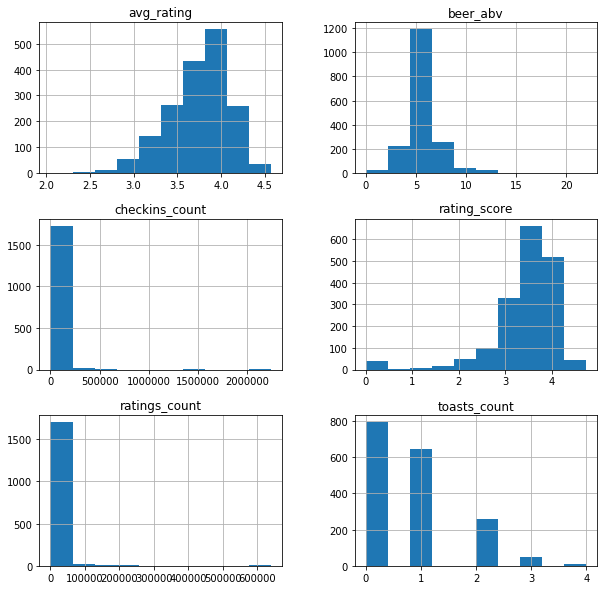

In [18]:
# Let's explore the numerical variables first, with a histogram plot
beers.hist(figsize=(10,10));

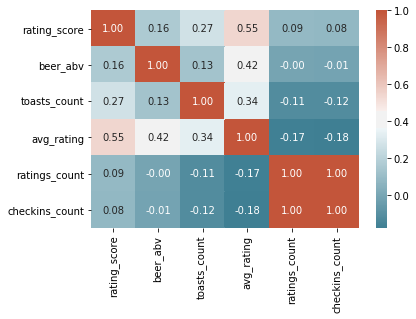

In [44]:
# next up: correlation plot using Spearman's, a non-parametric correlation method used to 
# summarize the strength of the nonlinear relationship between two data samples.

cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
htmp = sns.heatmap(beers.corr(method='spearman'), cmap=cmap, annot=True, fmt=".2f");
bottom, top = htmp.get_ylim();
htmp.set_ylim(bottom + 0.5, top - 0.5);

C:\Users\jasper.kuller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


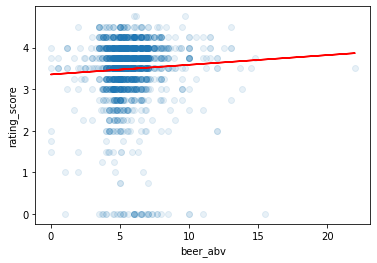

In [20]:
# Zooming in on avg_rating & beer_abv: how does a scatter plot of those two look like?

X = beers.beer_abv
Y = beers.rating_score
X = np.array( [ [value,1] for value in X ] )
m, b = np.linalg.lstsq(X, Y)[0]
plt.plot(beers.beer_abv,beers.rating_score,'o', alpha=.1);
plt.ylabel('rating_score')
plt.xlabel('beer_abv')

# best fit line
x= beers.beer_abv
plt.plot(x, m*x + b,'r',label='Best Fit Line');

In [21]:
# It seems we've found some hidden null values! 
# The layer of 0.00 rating at the bottom of the scatterplot is probably how it's registered when someone checks in,
# but doesn't rate (the lowest possible rate is 0.25).

beers = beers[beers.rating_score != 0.00]
beers['rating_score'].value_counts()

4.00    350
3.75    346
3.50    316
3.25    194
4.25    167
3.00    133
2.75     58
4.50     43
2.50     41
2.00     27
2.25     22
1.50     10
1.00      4
1.75      4
4.75      3
0.75      3
1.25      2
Name: rating_score, dtype: int64

C:\Users\jasper.kuller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


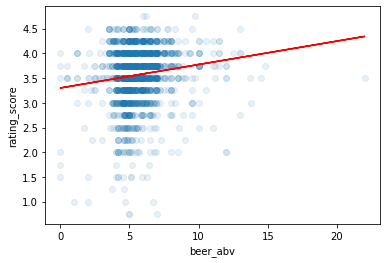

In [22]:
X = beers.beer_abv
Y = beers.rating_score
X = np.array( [ [value,1] for value in X ] )
m, b = np.linalg.lstsq(X, Y)[0]
plt.plot(beers.beer_abv,beers.rating_score,'o', alpha=.1);
plt.ylabel('rating_score')
plt.xlabel('beer_abv')

# best fit line
x= beers.beer_abv
plt.plot(x, m*x + b,'r',label='Best Fit Line');

C:\Users\jasper.kuller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


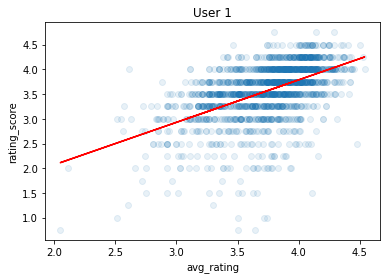

In [45]:
# In the correlation heatmap, rating_score & avg_rating seem related.
# What does a scatter plot of these two look like?

X = beers.avg_rating
Y = beers.rating_score
X = np.array( [ [value,1] for value in X ] )
m, b = np.linalg.lstsq(X, Y)[0]
plt.plot(beers.avg_rating,beers.rating_score,'o', alpha=.1);
plt.ylabel('rating_score')
plt.xlabel('avg_rating')
plt.title('User 1')

# best fit line
x= beers.avg_rating
plt.plot(x, m*x + b,'r',label='Best Fit Line');

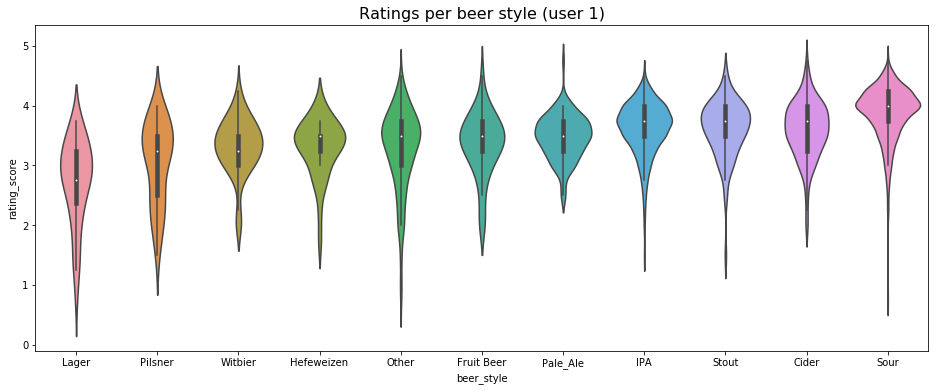

In [46]:
plt.figure(figsize=(16,6))
sns.violinplot(beers.beer_style, beers.rating_score, order=['Lager','Pilsner','Witbier','Hefeweizen','Other','Fruit Beer','Pale_Ale','IPA','Stout','Cider','Sour'])
plt.title('Ratings per beer style (user 1)', fontsize=16)
plt.show()

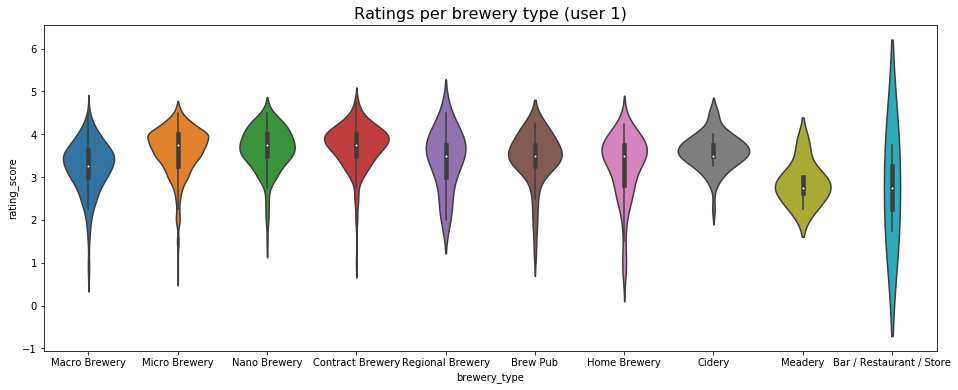

In [48]:
plt.figure(figsize=(16,6))
sns.violinplot(beers.brewery_type, beers.rating_score)
plt.title('Ratings per brewery type (user 1)', fontsize=16)
plt.show()

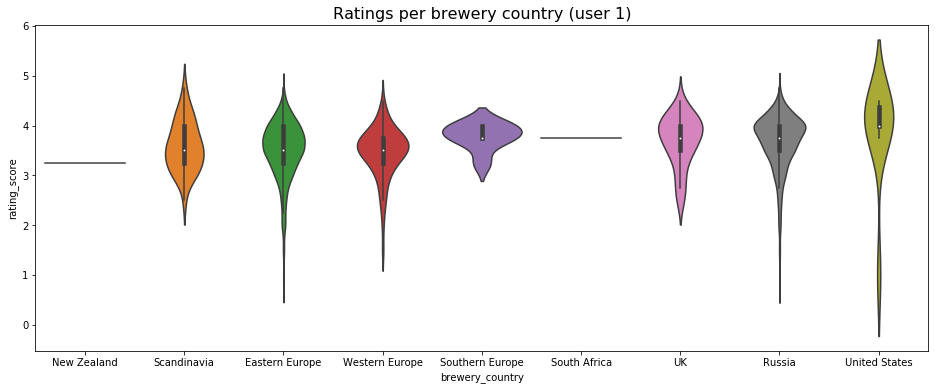

In [49]:
plt.figure(figsize=(16,6))
sns.violinplot(beers.brewery_country, beers.rating_score, order=['New Zealand','Scandinavia','Eastern Europe','Western Europe','Southern Europe','South Africa','UK','Russia','United States'])
plt.title('Ratings per brewery country (user 1)', fontsize=16)
plt.show()

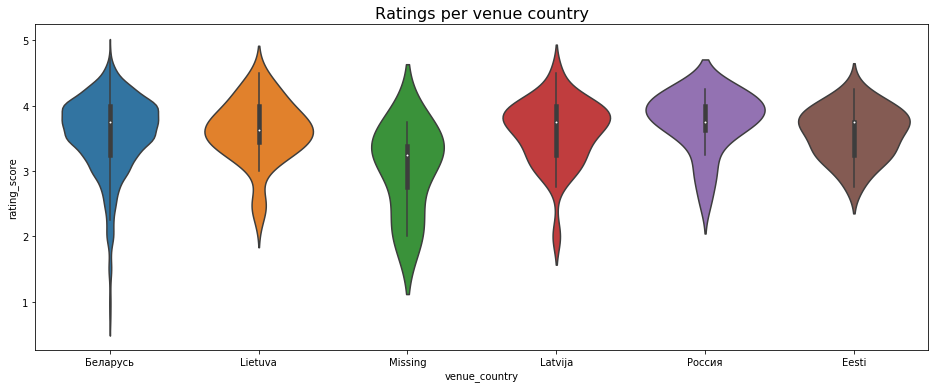

In [27]:
plt.figure(figsize=(16,6))
sns.violinplot(beers.venue_country, beers.rating_score)
plt.title('Ratings per venue country', fontsize=16)
plt.show()

## 3. Modelling

For sake of simplicity, we'll start with a linear regression model to predict rating_score.

In [28]:
# Let's see how the model does with numerical variables only
num_beers.describe()

,rating_score,beer_abv,toasts_count,avg_rating,ratings_count,checkins_count
count,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1.764000e+03
mean,3.484552,5.642557,0.775510,3.744599,10524.557256,2.498015e+04
std,0.781510,1.658378,0.851112,0.349642,59890.861272,1.896451e+05
min,0.000000,0.000000,0.000000,2.050000,2.000000,2.000000e+00
25%,3.250000,4.700000,0.000000,3.530000,158.000000,1.820000e+02
50%,3.750000,5.500000,1.000000,3.800000,376.000000,4.390000e+02
75%,4.000000,6.400000,1.000000,4.000000,1386.000000,1.751750e+03
max,4.750000,22.000000,4.000000,4.570000,640549.000000,2.240000e+06


In [29]:
# Split into explanatory and response variables
X = num_beers[['beer_abv', 'toasts_count', 'avg_rating', 'ratings_count','checkins_count']]
y = num_beers['rating_score']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=1337) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
# Predict and score the model
y_test_preds = lm_model.predict(X_test) 


print(metrics.r2_score(y_test, y_test_preds)) #Rsquared
print(metrics.mean_squared_error(y_test, y_test_preds)) #MSE.

0.20032670177671308
0.455301153266394


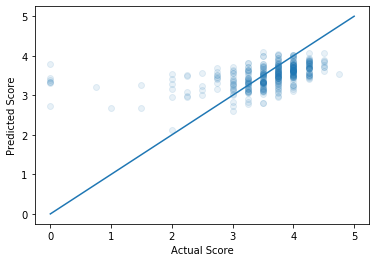

In [30]:
plt.scatter(y_test, y_test_preds, alpha=.1)
plt.ylabel('Predicted Score')
plt.xlabel('Actual Score')
plt.plot([0,5], [0,5])
plt.show()

Now let's see if we can increase that score by adding categorical variables to our model.

In [31]:
# Dropping irrelevant columns
beers = beers.drop(columns=['created_at','brewery_name','brewery_city','venue_name','venue_city'])
cat_beers = beers.select_dtypes(include=['object']).copy()
cat_beers.describe()

,beer_style,brewery_type,brewery_country,venue_country
count,1723,1723,1723,1723
unique,11,10,9,6
top,Sour,Micro Brewery,Eastern Europe,Беларусь
freq,505,938,959,1539


In [32]:
# Creating dummy columns with encoded values

cat_cols_lst = cat_beers.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [33]:
beers_new = create_dummy_df(beers, cat_cols_lst, dummy_na=False) 
print(beers_new.shape)

(1723, 38)


In [34]:
beers_new.head(3)

,rating_score,beer_abv,toasts_count,avg_rating,ratings_count,checkins_count,beer_style_Fruit Beer,beer_style_Hefeweizen,beer_style_IPA,beer_style_Lager,beer_style_Other,beer_style_Pale_Ale,beer_style_Pilsner,beer_style_Sour,...,brewery_type_Regional Brewery,brewery_country_New Zealand,brewery_country_Russia,brewery_country_Scandinavia,brewery_country_South Africa,brewery_country_Southern Europe,brewery_country_UK,brewery_country_United States,brewery_country_Western Europe,venue_country_Latvija,venue_country_Lietuva,venue_country_Missing,venue_country_Беларусь,venue_country_Россия
0,3.00,4.3,1,3.08,26179.0,36105.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.25,5.0,1,3.18,2131.0,3365.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3.75,5.0,2,3.69,374.0,407.0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [35]:
#Split into explanatory and response variables
X = beers_new.drop('rating_score', axis=1)
y = beers_new['rating_score']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1337)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = metrics.r2_score(y_test, y_test_preds)
train_score = metrics.r2_score(y_train, y_train_preds)

MSE_train = metrics.mean_squared_error(y_train, y_train_preds)
MSE_test = metrics.mean_squared_error(y_test, y_test_preds)

MAE_train = metrics.mean_absolute_error(y_train, y_train_preds)
MAE_test = metrics.mean_absolute_error(y_test, y_test_preds)

RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_preds))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_preds))


#Rsquared score
print("R2-score training data: {}. R2-score test data: {}.".format(train_score, test_score))

#MAE score
print("MAE training data: {}. MAE test data: {}.".format(MAE_train, MAE_test))

#MSE score
print("MSE training data: {}. MSE test data: {}.".format(MSE_train, MSE_test))

#RMSE score
print("RMSE training data: {}. RMSE test data: {}.".format(RMSE_train, RMSE_test))

R2-score training data: 0.4393694226071526. R2-score test data: 0.3122617796250319.
MAE training data: 0.32138413872514243. MAE test data: 0.3097243724228071.
MSE training data: 0.1944984550356744. MSE test data: 0.17151058708769276.
RMSE training data: 0.4410197898458463. RMSE test data: 0.41413836708000473.


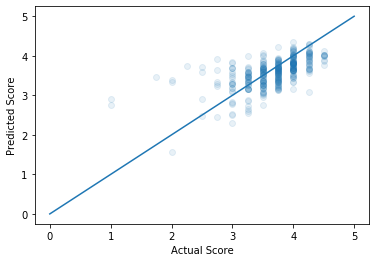

In [36]:
plt.scatter(y_test, y_test_preds, alpha=.1)
plt.ylabel('Predicted Score')
plt.xlabel('Actual Score')
plt.plot([0,5], [0,5])
plt.show()

Still not a very good score. Let's use a different algorithm: Random Forest.

In [37]:
#Split into explanatory and response variables
X = beers_new.drop('rating_score', axis=1)
y = beers_new['rating_score']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1337)

# Instantiate & fit
regressor = RandomForestRegressor(n_estimators=1000, max_depth=5) 
regressor.fit(X_train, y_train)

#Predict using your model
y_test_preds = regressor.predict(X_test)
y_train_preds = regressor.predict(X_train)

#Score using your model
test_score = metrics.r2_score(y_test, y_test_preds)
train_score = metrics.r2_score(y_train, y_train_preds)

MSE_train = metrics.mean_squared_error(y_train, y_train_preds)
MSE_test = metrics.mean_squared_error(y_test, y_test_preds)

MAE_train = metrics.mean_absolute_error(y_train, y_train_preds)
MAE_test = metrics.mean_absolute_error(y_test, y_test_preds)

RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_preds))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_preds))

#Rsquared score
print("R2-score training data: {}. R2-score test data: {}.".format(train_score, test_score))

#MAE score
print("MAE training data: {}. MAE test data: {}.".format(MAE_train, MAE_test))

#MSE score
print("MSE training data: {}. MSE test data: {}.".format(MSE_train, MSE_test))

#RMSE score
print("RMSE training data: {}. RMSE test data: {}.".format(RMSE_train, RMSE_test))

R2-score training data: 0.5148984852654908. R2-score test data: 0.31713831044238094.
MAE training data: 0.30441942352947454. MAE test data: 0.3130943919047532.
MSE training data: 0.16829530702748863. MSE test data: 0.17029446060430672.
RMSE training data: 0.4102381101598054. RMSE test data: 0.4126674940000808.


Well, guess it's a start. But how good a start? What do the metrics mean in the real world?

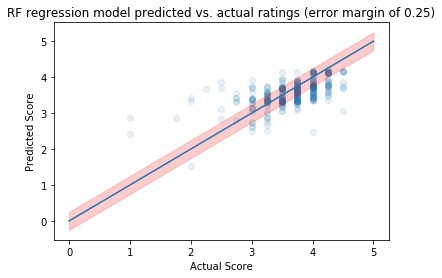

In [50]:
plt.scatter(y_test, y_test_preds, alpha=.1)
plt.ylabel('Predicted Score')
plt.xlabel('Actual Score')
plt.plot([0,5], [0,5])
plt.fill_between([0,5], y1=[0.25,5.25], y2=[-0.25,4.75], alpha=.2, color='r')
plt.title('RF regression model predicted vs. actual ratings (error margin of 0.25)')
plt.show()

In [39]:
model_range = np.sum((y_test - y_test_preds) <= 0.25) / len(y_test)
model_range

0.6608695652173913

We can interpret the above as follows: in 66% of the time, the predicted rating doesn't deviate more than 0.25 from the actual rating. This means that a beer rated as 3.5, for example, would usually be predicted as falling in the 3.25 to 3.75 range. Sounds pretty good, right?
But how does this compare to the baseline? What would be the proportion of ratings in the 0.25 range if we simply choose the mean of our training data| for all our predictions?

In [40]:
y_test_baseline = np.repeat(np.mean(y_train), len(y_test))

In [41]:
baseline_range = np.sum((y_test - y_test_baseline) <= 0.25) / len(y_test)
baseline_range

0.6463768115942029

In [42]:
uplift = model_range/baseline_range-1
uplift

0.022421524663676973

That doesn't look good: our best model only outperforms the baseline with a meagre 2%. Conclusion: more data is required!